<h1 style = "color : #00008B">BoomBikes - Linear Regression Assignment</h1>

<h2 style = "color : Brown">Step 1: Reading and Understanding the Data</h2>

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import calendar
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
bike_rental=pd.read_csv('day.csv')
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Summary of the data frame
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_rental.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

*- All the columns has non-null values, so no missing values*   

In [5]:
bike_rental_wodup = bike_rental.drop_duplicates()
bike_rental_wodup.equals(bike_rental)

True

*-No duplicated rows found*   

In [6]:
#summary of Numeric columns
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Lets get rid of some columns which are not necessary, their values can be interpreted from other columns

instant- its just used for record index and doesn't add any value here
<br><br>
dteday - It's more of a categorical variable with huge subset of values. Also the details can be interpreted with other variables 'yr', 'mnth', 'weekday'
<br><br>
casual, registered - These are sub categories of total rental count 'cnt'. The output variable for us here is 'cnt' and these 2 values are not going to add much value here.

In [7]:
df_rental=bike_rental.drop(['instant','casual', 'registered', 'dteday'], axis=1)
df_rental.shape

(730, 12)

In [8]:
df_rental.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

<h2 style = "color : Brown">Step 2: Visualize the Data</h2>

Let's see if Linear regression will fit for this data

In [9]:
# Selecting the numeric values to do a pair plot
num_var=['cnt','temp','atemp','hum','windspeed']

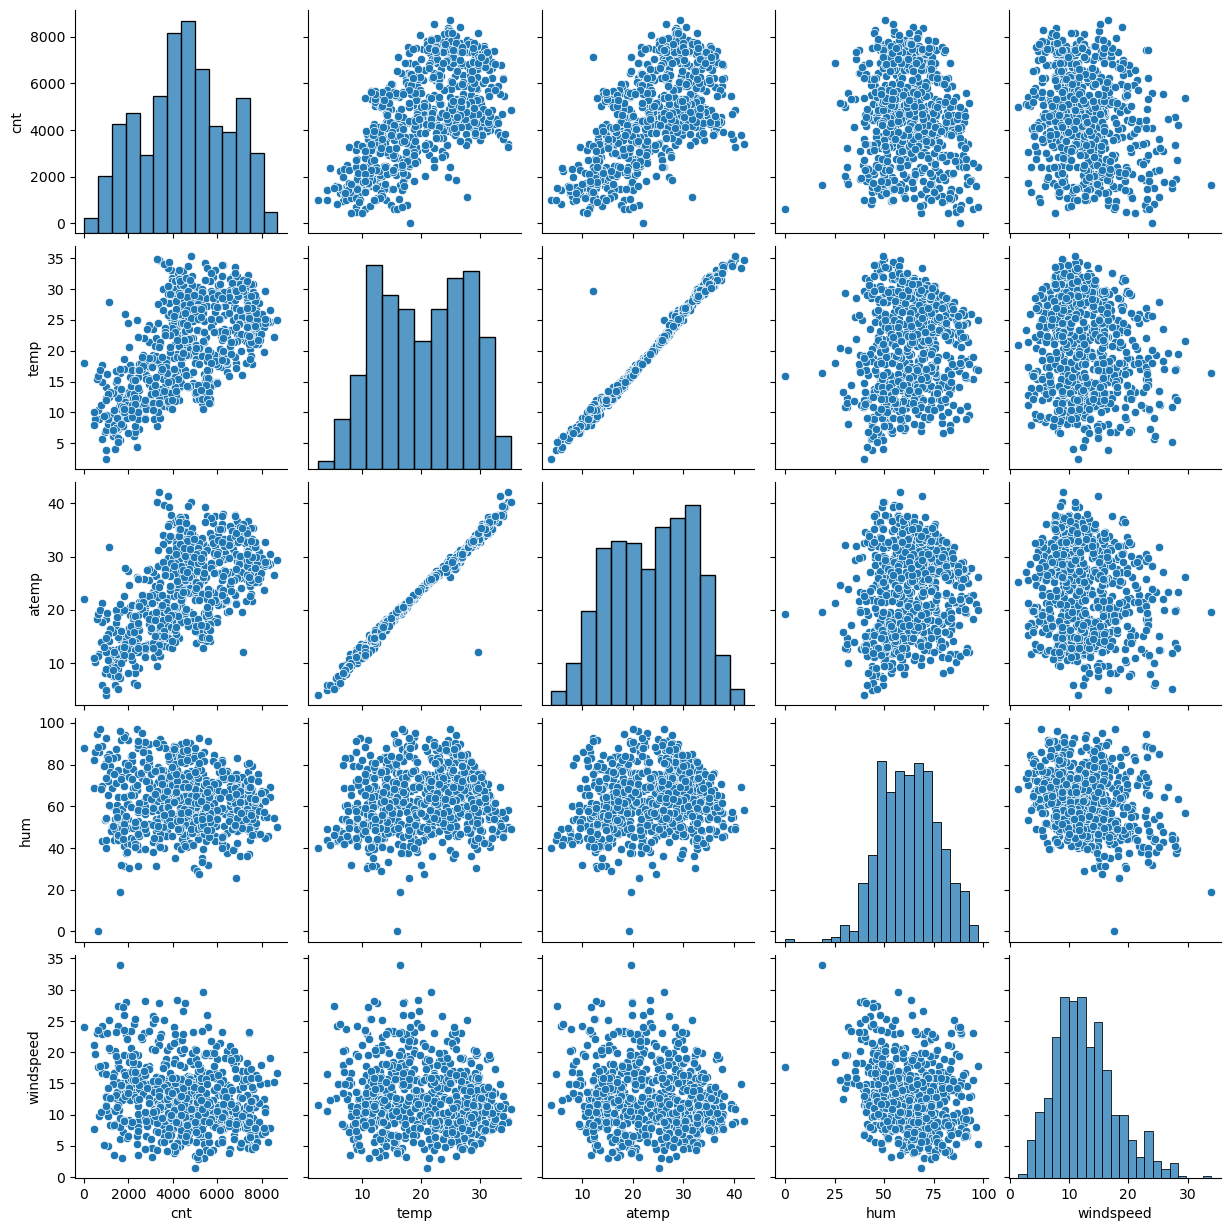

In [10]:
sns.pairplot(df_rental[num_var])
plt.show()

- We could see a linear relationship for 'cnt' against 'temp' and 'atemp'. There is a considerable amount of increase variance as the cnt increases which could be due to influence of other variables. Linear regression model will fit for this data
- There seems to be a Multicollinearity/strong dependency between 'temp' and 'atemp' - one of these columns should be dropped. Lets decide it later with significance level and VIF

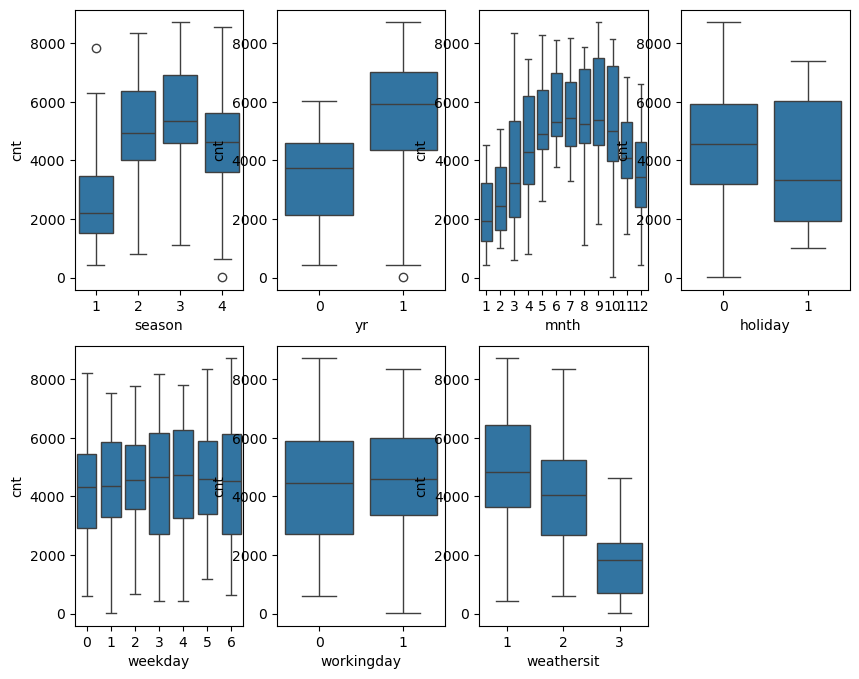

In [11]:
#visualize categorical variables


plt.figure(figsize=(10,8))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=df_rental)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=df_rental)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=df_rental)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=df_rental)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=df_rental)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=df_rental)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=df_rental)

plt.show()

Except, 'Workingday' and 'holiday' all others seems to have some influence on 'cnt' variable. We will take the decision to drop them later, based on P-value and VIF

<h2 style = "color : Brown">Step 3: Data Preparation</h2>

In [12]:
df_rental.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [13]:
# Quick look at the values present in each categotrical variable.

print(df_rental['season'].value_counts())
print(df_rental['yr'].value_counts())
print(df_rental['holiday'].value_counts())
print(df_rental['weekday'].value_counts())
print(df_rental['workingday'].value_counts())
print(df_rental['weathersit'].value_counts())

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
workingday
1    499
0    231
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64


In [14]:
# Replacing categorical numericals with categorical string values, especially the ones that have more than 2 categories. 
# This is important for us while collecting dummy variables

varlist=['season', 'mnth', 'weekday', 'weathersit']

In [15]:
df_rental['season']=df_rental['season'].map({1:'spring', 2:'summer',3:'fall',4:'winter'})

In [16]:
df_rental['weekday']=df_rental['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [17]:
df_rental['weathersit']=df_rental['weathersit'].map({1:'Clear sky',2:'Mist & Cloudy',3:'Light Snow',4:'Heavy Rain'})

In [18]:
#Replacing the month numbers with Month Names using calendar module
df_rental['mnth']=df_rental['mnth'].apply(lambda x:calendar.month_name[x])

In [19]:
df_rental['mnth'].value_counts()

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

In [20]:
#creating dummy variables
dummy_var=pd.get_dummies(df_rental[varlist], drop_first=True)
dummy_var

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
726,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
727,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
728,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [21]:
dummy_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   season_spring             730 non-null    bool 
 1   season_summer             730 non-null    bool 
 2   season_winter             730 non-null    bool 
 3   mnth_August               730 non-null    bool 
 4   mnth_December             730 non-null    bool 
 5   mnth_February             730 non-null    bool 
 6   mnth_January              730 non-null    bool 
 7   mnth_July                 730 non-null    bool 
 8   mnth_June                 730 non-null    bool 
 9   mnth_March                730 non-null    bool 
 10  mnth_May                  730 non-null    bool 
 11  mnth_November             730 non-null    bool 
 12  mnth_October              730 non-null    bool 
 13  mnth_September            730 non-null    bool 
 14  weekday_Monday            730 non-null    

In [22]:
# get_dummies returned all the values in boolean. Lets convert them to values 0 and 1
dummy_var=dummy_var.apply(lambda x:x.map({True:1, False:0}))
dummy_var.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
dummy_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   season_spring             730 non-null    int64
 1   season_summer             730 non-null    int64
 2   season_winter             730 non-null    int64
 3   mnth_August               730 non-null    int64
 4   mnth_December             730 non-null    int64
 5   mnth_February             730 non-null    int64
 6   mnth_January              730 non-null    int64
 7   mnth_July                 730 non-null    int64
 8   mnth_June                 730 non-null    int64
 9   mnth_March                730 non-null    int64
 10  mnth_May                  730 non-null    int64
 11  mnth_November             730 non-null    int64
 12  mnth_October              730 non-null    int64
 13  mnth_September            730 non-null    int64
 14  weekday_Monday            730 non-null    

In [24]:
# Concatinating these dummy variables with original dataframe
df_rental =pd.concat([df_rental, dummy_var], axis=1)
df_rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear sky,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear sky,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear sky,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# Dropping the original categorical variables for which we created dummy variables
df_rental=df_rental.drop(varlist, axis=1)
df_rental.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   hum                       730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   cnt                       730 non-null    int64  
 8   season_spring             730 non-null    int64  
 9   season_summer             730 non-null    int64  
 10  season_winter             730 non-null    int64  
 11  mnth_August               730 non-null    int64  
 12  mnth_December             730 non-null    int64  
 13  mnth_February             730 non-null    int64  
 14  mnth_Janua

<h2 style = "color : Brown">Step 4: Splitting the data into Training and Testing sets</h2>

In [27]:
#train-test-split -> from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test=train_test_split(df_rental, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
#scaling using Min-Max Scaling
scaler=MinMaxScaler()
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [30]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


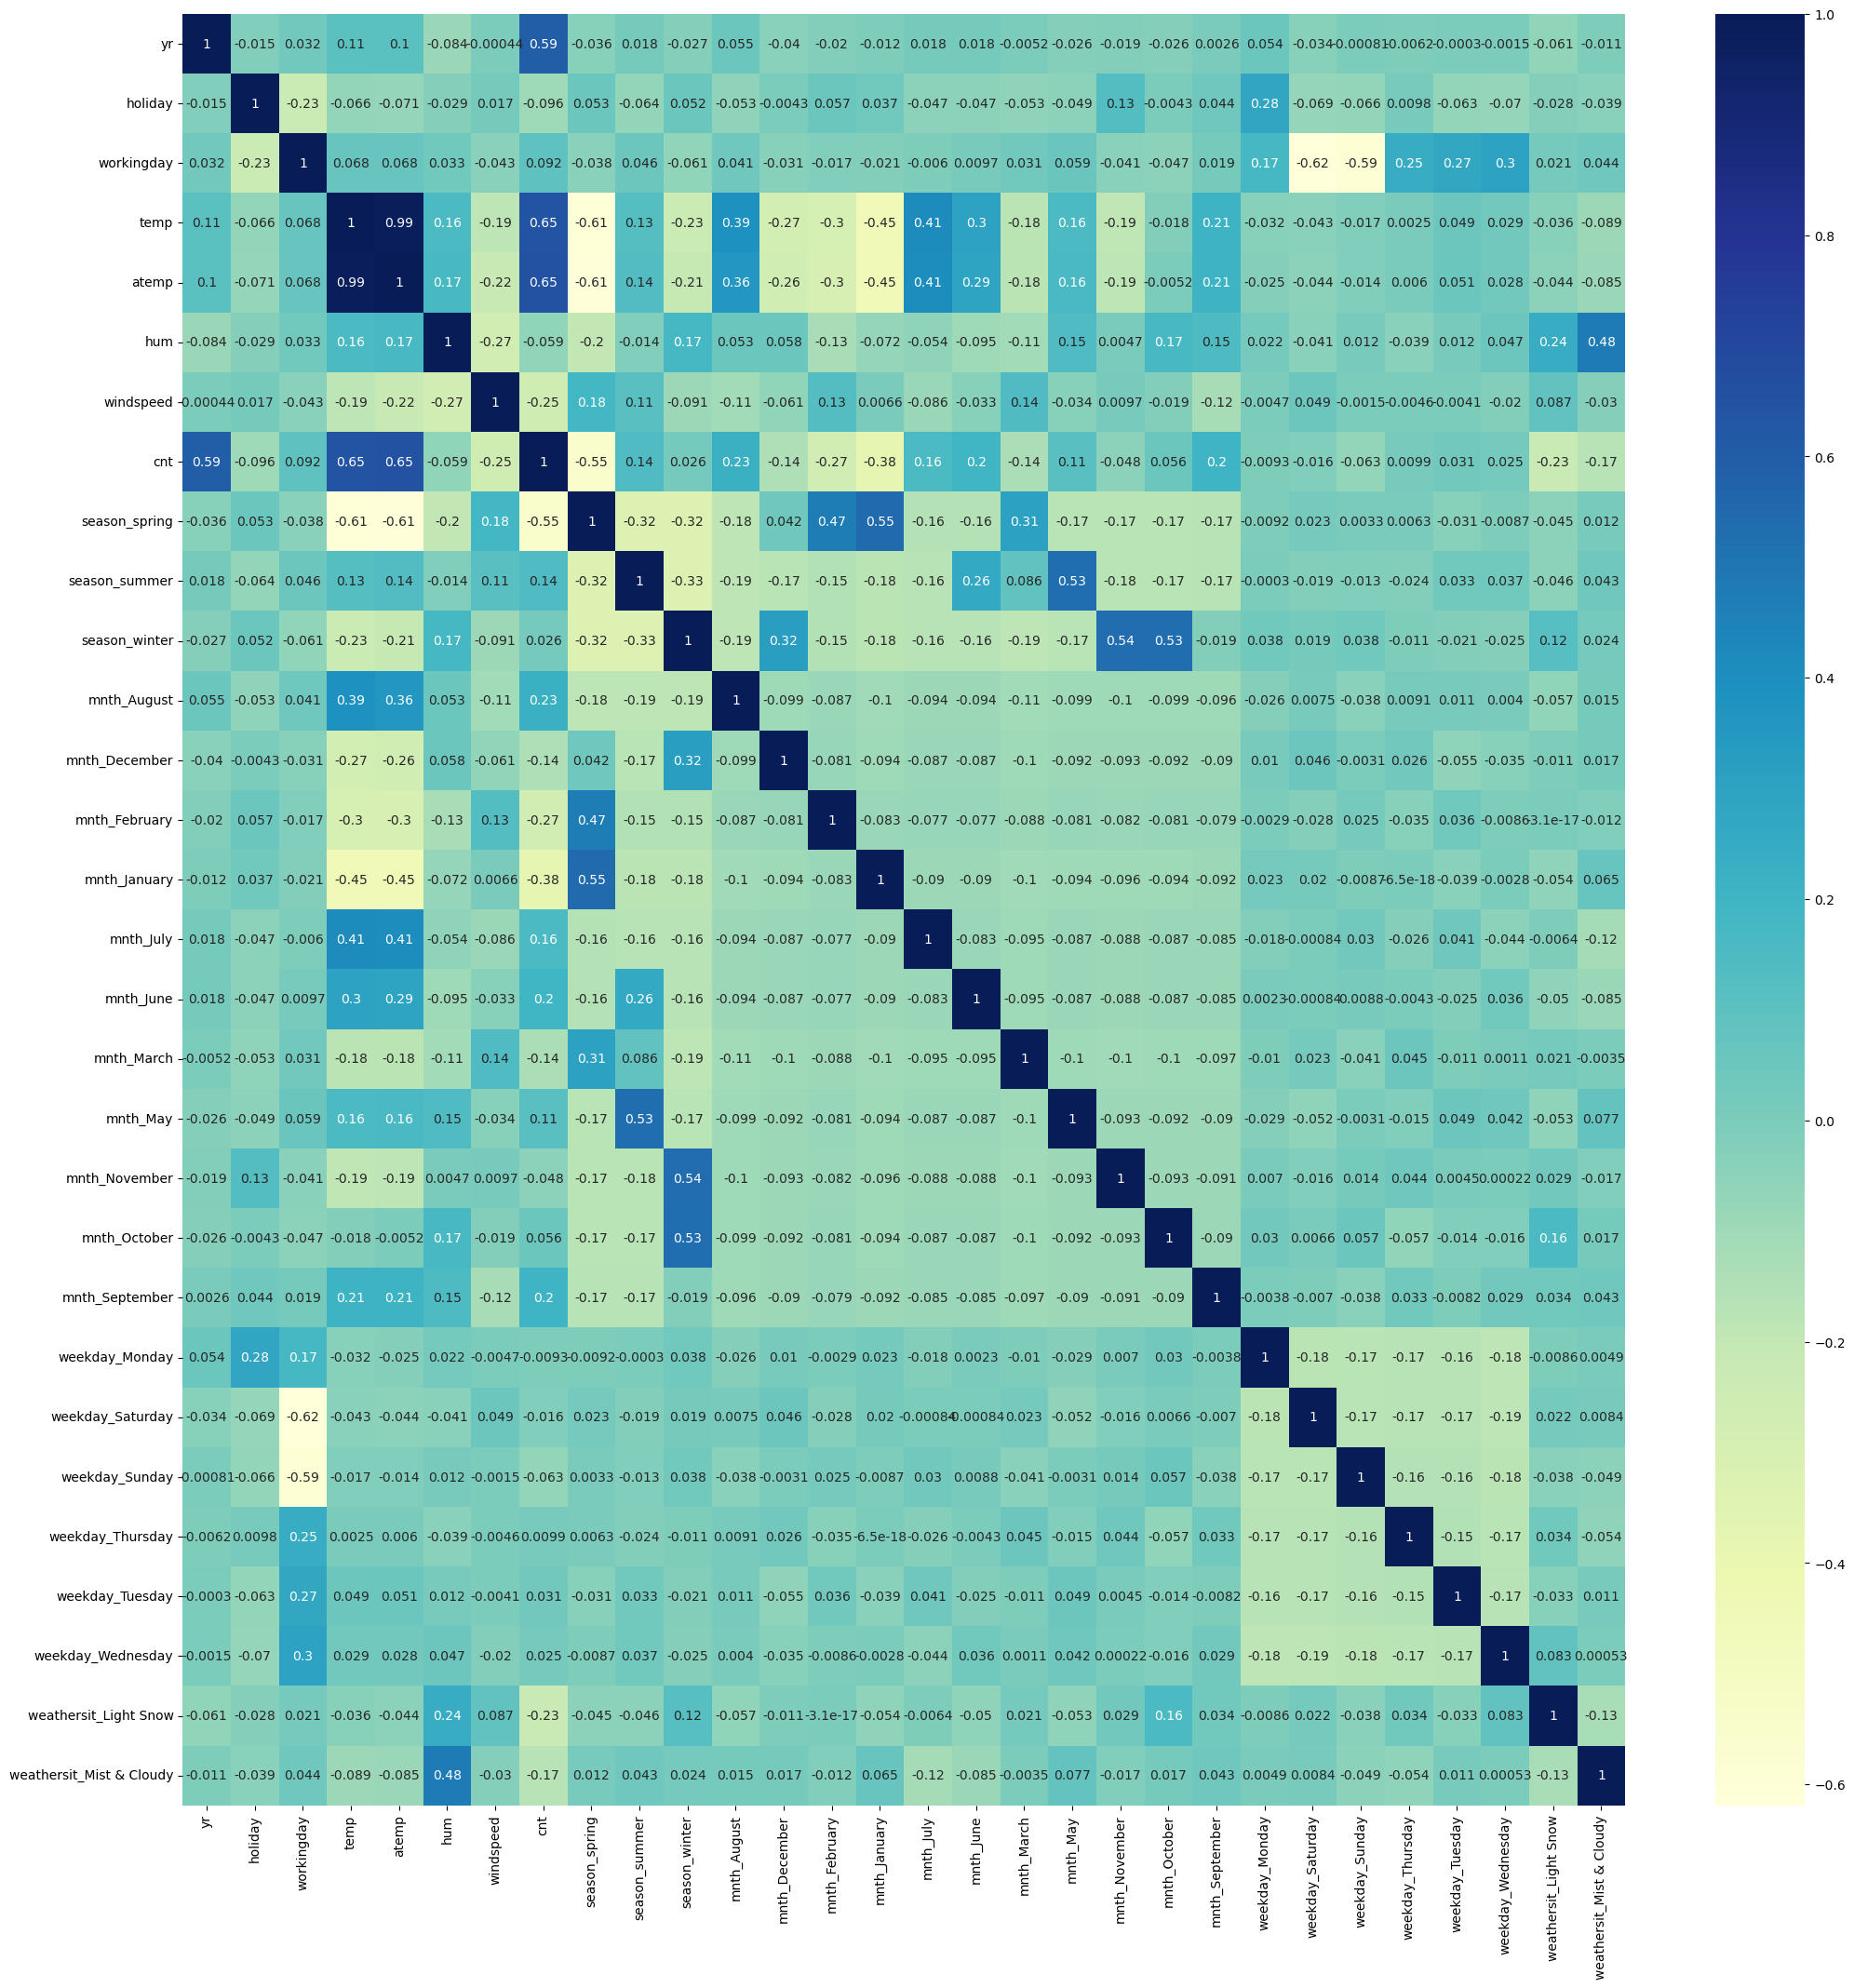

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(), annot=True,cmap='YlGnBu')
plt.show()

- We can see 'cnt' seems to be coorelated to 'temp' and 'atemp' the most. Apart from that 'temp' and 'atemp' has the correlation coefficient of 0.99 strongly indicating one of them should be removed

- Lets plot a Pairplot b/w 'cnt' and 'temp' 

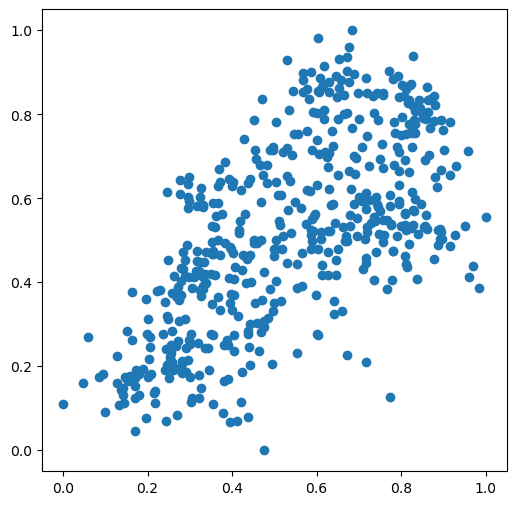

In [32]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

<h2 style = "color : Brown">Step 5: Building the model</h2>

In [33]:
# Divinding X and Y sets for Model Building

y_train=df_train.pop('cnt')
X_train=df_train

In [34]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [35]:
import statsmodels
import statsmodels.api as sm
import sklearn

In [36]:
X_train_sm= sm.add_constant(X_train['temp'])
lr=sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

In [37]:
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

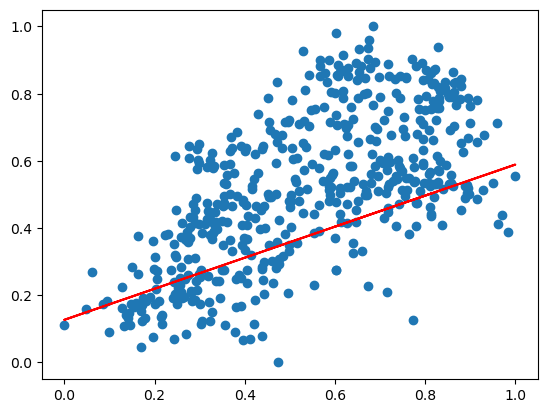

In [38]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.127 + 0.462*X_train_sm.iloc[:, 1], 'r')
plt.show()

In [39]:
#Checking summary to see the Significance level and r-squared value.
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           2.46e-61
Time:                        15:17:06   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can keep adding more variables one by one to see how they impact R-squared and significance levels. Since there are so many variables, doing one by one will take so much time. Therefore lets use RFE.

In [40]:
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(y_train, X_train_lm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.81e-180
Time:                        15:17:06   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2433      0.035      6.887      0.000       0.174       0.313
yr                           0.2325      0.008     28.794      0.000       0.217       0.248
holiday                      0.0109      0.024      0.451      0.652      -0.037       0.058
workingday                   0.0963      0.012      7.835      0.000       0.072       0.120
temp                         0.3880      0.142      2.727      0.007       0.108       0.668
atemp                        0.0590      0.138      0.426      0.670      -0.213       0.331
hum                         -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                   -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring               -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer                0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter                0.1071      0.028      3.826      0.000       0.052       0.162
mnth_August                  0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_December               -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_February               -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_January                -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_July                   -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_June                    0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_March                   0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May                     0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_November               -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_October                 0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_September               0.0868      0.032      2.711      0.007       0.024       0.150
weekday_Monday              -0.0216      0.015     -1.401      0.162      -0.052       0.009
weekday_Saturday             0.0952      0.014      6.910      0.000       0.068       0.122
weekday_Sunday               0.0410      0.014      2.929      0.004       0.013       0.068
weekday_Thursday            -0.0097      0.016     -0.623      0.534      -0.040       0.021
weekday_Tuesday             -0.0184      0.016     -1.184      0.237      -0.049       0.012
weekday_Wednesday           -0.0059      0.015     -0.394      0.694      -0.035       0.023
weathersit_Light Snow       -0.2550      0.026     -9.631      0.000      -0.307      -0.203
weathersit_Mist & Cloudy    -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train_lm.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
24,weekday_Thursday,inf
2,workingday,inf
3,temp,inf
23,weekday_Sunday,inf
4,atemp,66.90
5,hum,56.03
8,season_summer,10.77
10,mnth_August,9.46
9,season_winter,8.29
19,mnth_October,6.79


In [43]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 5),
 ('mnth_December', False, 13),
 ('mnth_February', False, 11),
 ('mnth_January', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_March', False, 7),
 ('mnth_May', False, 4),
 ('mnth_November', False, 10),
 ('mnth_October', False, 3),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [46]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_September', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light Snow', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_January', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November',
       'mnth_October', 'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

Building model using RFE

<h3 style = "color : #006400">Model 1  </h3>

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe=X_train[col]

In [49]:
X_train_rfe=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        15:17:07   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1995      0.028      7.200      0.000       0.145       0.254
yr                           0.2298      0.008     28.647      0.000       0.214       0.246
holiday                     -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday                   0.0837      0.010      8.665      0.000       0.065       0.103
temp                         0.5277      0.033     15.884      0.000       0.462       0.593
hum                         -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                   -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring               -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer                0.0537      0.015      3.631      0.000       0.025       0.083
season_winter                0.0992      0.017      5.815      0.000       0.066       0.133
mnth_July                   -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_September               0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Saturday             0.0937      0.012      8.040      0.000       0.071       0.117
weekday_Sunday               0.0406      0.012      3.315      0.001       0.017       0.065
weathersit_Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist & Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
12,weekday_Saturday,inf
13,weekday_Sunday,inf
7,season_spring,5.02
4,temp,3.62
9,season_winter,3.49
8,season_summer,2.62
5,hum,1.91
15,weathersit_Mist & Cloudy,1.57


variable 'hoilday' has high P-Value and High VIF, so we will remove this and build a model again.

<h3 style = "color : #006400">Model 2</h3>

In [51]:
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

In [52]:
X_train_rfe=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.11e-191
Time:                        15:17:07   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1811      0.042      4.301      0.000       0.098       0.264
yr                           0.2298      0.008     28.647      0.000       0.214       0.246
workingday                   0.1021      0.025      4.024      0.000       0.052       0.152
temp                         0.5277      0.033     15.884      0.000       0.462       0.593
hum                         -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed                   -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring               -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer                0.0537      0.015      3.631      0.000       0.025       0.083
season_winter                0.0992      0.017      5.815      0.000       0.066       0.133
mnth_July                   -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_September               0.0820      0.017      4.966      0.000       0.050       0.114
weekday_Saturday             0.1121      0.027      4.181      0.000       0.059       0.165
weekday_Sunday               0.0591      0.027      2.192      0.029       0.006       0.112
weathersit_Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_Mist & Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,114.08
2,workingday,9.07
11,weekday_Saturday,6.06
12,weekday_Sunday,5.74
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
7,season_summer,2.62
4,hum,1.91
14,weathersit_Mist & Cloudy,1.57


Now P-values are fine, but we have quite some variables with high VIF value. We will drop 'workingday'

<h3 style = "color : #006400">Model 3 </h3>

In [54]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

In [55]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,74.89
5,season_spring,5.01
2,temp,3.62
7,season_winter,3.48
6,season_summer,2.62
3,hum,1.91
13,weathersit_Mist & Cloudy,1.57
8,mnth_July,1.49
9,mnth_September,1.29
12,weathersit_Light Snow,1.25


In [56]:
X_train_rfe=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          4.02e-189
Time:                        15:17:07   Log-Likelihood:                 509.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     496   BIC:                            -931.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2804      0.035      8.096      0.000       0.212       0.348
yr                           0.2302      0.008     28.276      0.000       0.214       0.246
temp                         0.5292      0.034     15.693      0.000       0.463       0.595
hum                         -0.1621      0.038     -4.275      0.000      -0.237      -0.088
windspeed                   -0.1833      0.026     -7.105      0.000      -0.234      -0.133
season_spring               -0.0581      0.021     -2.779      0.006      -0.099      -0.017
season_summer                0.0542      0.015      3.605      0.000       0.025       0.084
season_winter                0.0964      0.017      5.568      0.000       0.062       0.130
mnth_July                   -0.0538      0.018     -2.932      0.004      -0.090      -0.018
mnth_September               0.0784      0.017      4.687      0.000       0.046       0.111
weekday_Saturday             0.0139      0.011      1.233      0.218      -0.008       0.036
weekday_Sunday              -0.0390      0.012     -3.339      0.001      -0.062      -0.016
weathersit_Light Snow       -0.2401      0.026     -9.078      0.000      -0.292      -0.188
weathersit_Mist & Cloudy    -0.0543      0.011     -5.154      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       79.998   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.199
Skew:                          -0.780   Prob(JB):                     1.38e-46
Kurtosis:                       5.740   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next we will drop weekday_Saturday which has a p-value 0.218

<h3 style = "color : #006400">Model 4  </h3>

In [57]:
X_train_rfe = X_train_rfe.drop(['weekday_Saturday'], axis=1)

In [58]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,74.37
5,season_spring,5.01
2,temp,3.62
7,season_winter,3.48
6,season_summer,2.62
3,hum,1.90
12,weathersit_Mist & Cloudy,1.56
8,mnth_July,1.49
9,mnth_September,1.29
11,weathersit_Light Snow,1.25


In [59]:
X_train_rfe=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.9
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          5.65e-190
Time:                        15:17:07   Log-Likelihood:                 508.62
No. Observations:                 510   AIC:                            -991.2
Df Residuals:                     497   BIC:                            -936.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2839      0.035      8.224      0.000       0.216       0.352
yr                           0.2299      0.008     28.236      0.000       0.214       0.246
temp                         0.5287      0.034     15.669      0.000       0.462       0.595
hum                         -0.1639      0.038     -4.322      0.000      -0.238      -0.089
windspeed                   -0.1822      0.026     -7.065      0.000      -0.233      -0.132
season_spring               -0.0580      0.021     -2.777      0.006      -0.099      -0.017
season_summer                0.0541      0.015      3.597      0.000       0.025       0.084
season_winter                0.0967      0.017      5.586      0.000       0.063       0.131
mnth_July                   -0.0534      0.018     -2.907      0.004      -0.089      -0.017
mnth_September               0.0785      0.017      4.689      0.000       0.046       0.111
weekday_Sunday              -0.0415      0.012     -3.606      0.000      -0.064      -0.019
weathersit_Light Snow       -0.2394      0.026     -9.051      0.000      -0.291      -0.187
weathersit_Mist & Cloudy    -0.0540      0.011     -5.126      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       75.693   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.010
Skew:                          -0.724   Prob(JB):                     4.11e-46
Kurtosis:                       5.782   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next we will drop 'season_spring' which has a VIF 5.01

<h3 style = "color : #006400">Model 5 </h3>

In [60]:
X_train_rfe = X_train_rfe.drop(['season_spring'], axis=1)

In [61]:
X_train_rfe=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train, X_train_rfe)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     236.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.63e-189
Time:                        15:17:07   Log-Likelihood:                 504.70
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     498   BIC:                            -934.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2236      0.027      8.278      0.000       0.171       0.277
yr                           0.2284      0.008     27.929      0.000       0.212       0.245
temp                         0.5986      0.023     26.495      0.000       0.554       0.643
hum                         -0.1757      0.038     -4.633      0.000      -0.250      -0.101
windspeed                   -0.1898      0.026     -7.349      0.000      -0.240      -0.139
season_summer                0.0834      0.011      7.746      0.000       0.062       0.105
season_winter                0.1349      0.011     12.725      0.000       0.114       0.156
mnth_July                   -0.0436      0.018     -2.404      0.017      -0.079      -0.008
mnth_September               0.0917      0.016      5.677      0.000       0.060       0.123
weekday_Sunday              -0.0418      0.012     -3.606      0.000      -0.065      -0.019
weathersit_Light Snow       -0.2341      0.027     -8.815      0.000      -0.286      -0.182
weathersit_Mist & Cloudy    -0.0514      0.011     -4.869      0.000      -0.072      -0.031
==============================================================================
Omnibus:                       69.129   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.004
Skew:                          -0.704   Prob(JB):                     3.30e-37
Kurtosis:                       5.434   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,44.91
3,hum,1.88
2,temp,1.60
11,weathersit_Mist & Cloudy,1.55
7,mnth_July,1.43
5,season_summer,1.33
6,season_winter,1.29
10,weathersit_Light Snow,1.24
8,mnth_September,1.19
4,windspeed,1.18


- Now all the variables have P-value and VIF withing desired limits. Lets finalize this model.

<h2 style = "color : Brown">Step 6: Residual Analysis</h2>

In [63]:
y_train_pred= lr_model.predict(X_train_rfe)
y_train_pred

576    0.718669
426    0.504499
728    0.343633
482    0.596444
111    0.258184
         ...   
578    0.814301
53     0.247164
350    0.272143
79     0.298458
520    0.664020
Length: 510, dtype: float64

<Axes: ylabel='Density'>

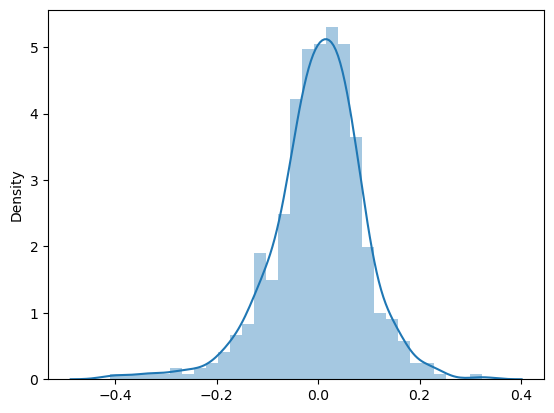

In [64]:
# check if the error terms are normally disctributed
plt.figure()
res=y_train-y_train_pred
sns.distplot(res)

<h2 style = "color : Brown">Step 7: Prediction and Evaluation on Test Set</h2>

Applying scaling on the test set

In [65]:
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [66]:
# Divinding into X_text and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [67]:
# Adding a constant variable 
X_test_sm= sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist & Cloudy
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,0,1,0,0,0,0


In [68]:
#dropping variables from X_test_sm
cols= X_train_rfe.columns
X_test_sm=X_test_sm[cols]

In [69]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     220 non-null    float64
 1   yr                        220 non-null    int64  
 2   temp                      220 non-null    float64
 3   hum                       220 non-null    float64
 4   windspeed                 220 non-null    float64
 5   season_summer             220 non-null    int64  
 6   season_winter             220 non-null    int64  
 7   mnth_July                 220 non-null    int64  
 8   mnth_September            220 non-null    int64  
 9   weekday_Sunday            220 non-null    int64  
 10  weathersit_Light Snow     220 non-null    int64  
 11  weathersit_Mist & Cloudy  220 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 22.3 KB


In [70]:
#making predictions
y_test_pred=lr_model.predict(X_test_sm)

##### Model Evaluation

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [72]:
r2=r2_score(y_test, y_test_pred)
r2

0.8040218722816193

In [73]:
# Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1),4)
print(adjusted_r2)

0.7927


Text(0, 0.5, 'y_pred')

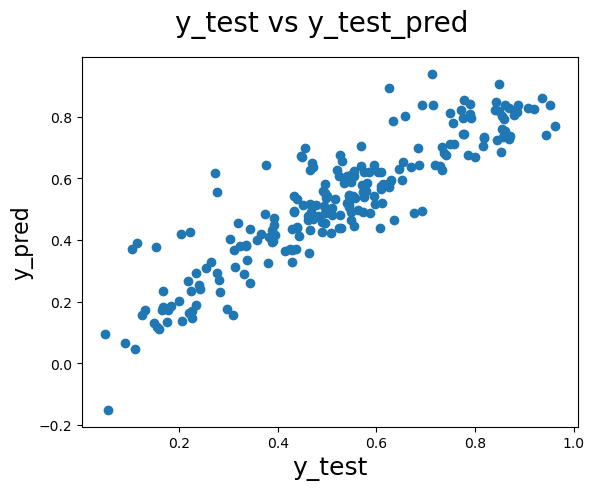

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [75]:
lr_model.params

const                       0.223600
yr                          0.228443
temp                        0.598613
hum                        -0.175693
windspeed                  -0.189754
season_summer               0.083390
season_winter               0.134873
mnth_July                  -0.043632
mnth_September              0.091732
weekday_Sunday             -0.041797
weathersit_Light Snow      -0.234148
weathersit_Mist & Cloudy   -0.051438
dtype: float64

So the rental count/Demand for bikes depends on above variables filtered and the Best fit line's equation is as below
<br></br>
cnt= 0.223 +0.228(yr) +0.599(temp) -0.176(hum) -0.190(windspeed) +0.083(season_summer)+0.134(season_winter) -0.044(mnth_July) +0.092(mnth_September) -0.042(weekday_Sunday) -0.234(weathersit_Light Snow ) -0.051(weathersit_Mist & Cloudy)

Training Data set R-squared = 0.839
<br></br>
Testing Data set R-squared = 0.804
<br></br>
Training Data set Adjusted R-squared =0.835
<br></br>
Testing Data set Adjusted R-squared = 0.7927